In [1]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

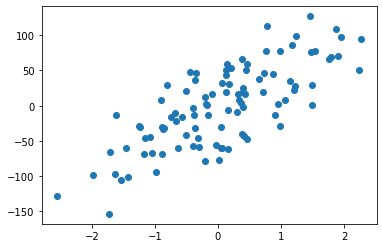

In [3]:
# посмотрим что получилось

pylab.plot(x, y, 'o')
pylab.show()

In [8]:
# размер данных

m, n = np.shape(x)
m, n

(100, 3)

In [7]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
#x[:5]

In [11]:
# y лист значений
y[:5]

array([-31.74599395, -28.79914206,  -2.18450294,  28.96679712,
       -30.8791169 ])

### Сначала вручную

In [96]:
# шаг алгоритма
alpha = 0.01

In [97]:
def gradient_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
#         print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

GRADIENT = (X_T * веса) / количество_данных

1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4

1 1 1 1 1 1 1 1 1 1 1 1    0.4
2 2 2 2 2 2 2 2 2 2 2 2    0.334
3 3 3 3 3 3 3 3 3 3 3 3    0.34
4 4 4 4 4 4 4 4 4 4 4 4    0.23


In [98]:
%%time
theta = gradient_descent_2(alpha, x, y, 1000)

Wall time: 22 ms


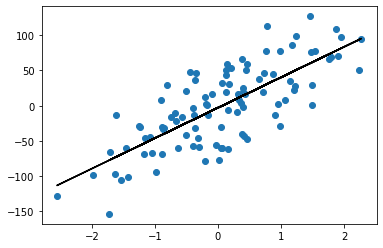

In [99]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    
# рисуем результат
pylab.plot(x[:,1],y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()

### Используем готовые методы

In [102]:
from sklearn import linear_model

In [103]:
model = linear_model.SGDRegressor( alpha = 0.01, max_iter = 1000 )

In [104]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

In [114]:
%%time 

model.fit( x, y )

Wall time: 999 µs


SGDRegressor(alpha=0.01)

In [115]:
model.intercept_, model.coef_

(array([-2.85060699]), array([42.71751248]))

In [116]:
y_predict_sgd = model.predict( x )

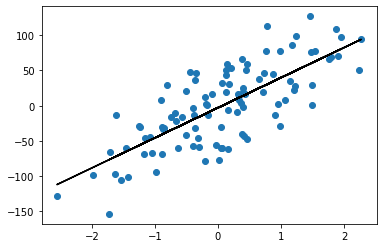

In [117]:
pylab.plot(x, y, 'o')
pylab.plot(x, y_predict_sgd, 'k-')
pylab.show()

#########  Домашнее задание ##########

In [9]:
from sklearn.linear_model import LogisticRegression
from numpy import e, log, dot
from numpy.random import rand
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs


In [10]:
#Градиент для линейной регрессии
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat


def gradientLinR(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            print("expected={}, predicted={}".format(row[-1], yhat))
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
        print('epoch={}, lrate={}, error={}'.format(epoch, l_rate, sum_error))
    return coef

#тестовый датасет
X1, Y1 = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)
print("Dependant(Y)...{}".format(Y1[:10,]))
print("InDependant(X)...{}".format(X1[:10,]))

#шаг обучения
lrate = 0.001
epochs = 100
res = gradientLinR(X1, lrate, epochs)
print(res)

Dependant(Y)...[-31.74599395 -28.79914206  -2.18450294  28.96679712 -30.8791169
  50.95046613 -93.57631576  16.24879305  53.00911661 -45.22174792]
InDependant(X)...[[-0.35955316]
 [ 0.97663904]
 [ 0.40234164]
 [-0.81314628]
 [-0.88778575]
 [ 0.44386323]
 [-0.97727788]
 [ 0.42833187]
 [ 0.20827498]
 [-0.31155253]]
expected=-0.3595531615405413, predicted=0.0
expected=0.9766390364837128, predicted=-0.0003595531615405413
expected=0.402341641177549, predicted=0.0006174454281047122
expected=-0.813146282044454, predicted=0.0010191696238541564
expected=-0.8877857476301128, predicted=0.0002050041721858481
expected=0.44386323274542566, predicted=-0.0006829865796164505
expected=-0.977277879876411, predicted=-0.0002384403602914084
expected=0.42833187053041766, predicted=-0.001215479799807528
expected=0.2082749780768603, predicted=-0.0007859324494773027
expected=-0.31155253212737266, predicted=-0.0005768715389509651
expected=-0.510805137568873, predicted=-0.0008878471995393867
expected=0.1269120927

expected=-0.6343220936809636, predicted=0.05772227915477326
expected=0.15634896910398005, predicted=0.05703023478193752
expected=0.04575851730144607, predicted=0.05712955351625956
expected=-1.1651498407833565, predicted=0.05711818248004475
expected=-0.3627411659871381, predicted=0.05589591445678135
expected=0.3563663971744019, predicted=0.055477277376337425
expected=-1.6138978475579515, predicted=0.05577816649613549
expected=-1.180632184122412, predicted=0.054108490482081405
epoch=28, lrate=0.001, error=101.68686202466162
expected=-0.3595531615405413, predicted=0.05287374980747691
expected=0.9766390364837128, predicted=0.05246132289612889
expected=0.402341641177549, predicted=0.053385500609716474
expected=-0.813146282044454, predicted=0.05373445675028431
expected=-0.8877857476301128, predicted=0.052867576011489566
expected=0.44386323274542566, predicted=0.051926922687847966
expected=-0.977277879876411, predicted=0.052318858997905546
expected=0.42833187053041766, predicted=0.05128926225

expected=0.1549474256969163, predicted=0.057005017163530174
expected=1.2224450703824274, predicted=0.05710295957206356
expected=1.8675579901499675, predicted=0.05826830168287392
expected=2.2697546239876076, predicted=0.06007759137134101
expected=-0.7421650204064419, predicted=0.06228726840395728
expected=0.06651722238316789, predicted=0.06148281611514688
expected=1.4940790731576061, predicted=0.0614878505214149
expected=-0.672460447775951, predicted=0.06292044174405109
expected=-1.6301983469660446, predicted=0.06218506085453109
expected=0.12898291075741067, predicted=0.06049267744671052
expected=0.9500884175255894, predicted=0.06056116768002122
expected=1.4882521937955997, predicted=0.06145069492986679
expected=0.05616534222974544, predicted=0.06287749642873253
expected=0.8644361988595057, predicted=0.06287078427453353
expected=0.7065731681919482, predicted=0.0636723496891185
expected=-0.1513572082976979, predicted=0.06431525050762132
expected=-1.0707526215105425, predicted=0.064099578

expected=0.4001572083672233, predicted=0.06024677504763658
expected=-1.7062701906250126, predicted=0.060586685480956165
expected=2.240893199201458, predicted=0.058819828604850195
expected=0.17742614225375283, predicted=0.061001901975446804
expected=-0.20515826376580087, predicted=0.06111832621572511
expected=1.2302906807277207, predicted=0.06085204962574359
expected=-0.8540957393017248, predicted=0.062021488256845565
expected=1.764052345967664, predicted=0.061105371029286995
expected=0.41059850193837233, predicted=0.06280831800422537
expected=-0.9072983643832422, predicted=0.06315610818815952
expected=-1.4200179371789752, predicted=0.06218565371558812
expected=0.46566243973045984, predicted=0.06070345012469355
expected=0.9008264869541871, predicted=0.06110840911429932
expected=1.1394006845433007, predicted=0.06194812719213921
expected=0.40198936344470165, predicted=0.06302557974949037
expected=0.386902497859262, predicted=0.06336454353318559
expected=-1.7262826023316769, predicted=0.06

In [12]:
#Градиент для логистической регрессии

#уравнение прогнозирования лог рег
#y = 1.0 / (1.0 + e^(-(b0 + b1 * X1 + b2 * X2)))
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return 1 / (1 + e**(-yhat))


def gradientLogR(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            print("expected={}, predicted={}".format(row[-1], yhat))
            error = row[-1] - yhat
            sum_error += error**2
            coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
    print('epoch={}, lrate={}, error={}'.format(epoch, l_rate, sum_error))
    return coef

#тестовый датасет
X_, y_ = make_blobs(n_samples=10, centers=2, n_features=2,random_state=0)
print("Classes .... {}".format(y_))
print("X .... {}".format(X_))

#шаг обучения
lrate = 0.001
epochs = 100
res = gradientLogR(X_, lrate, epochs)
print(res)

Classes .... [0 1 0 1 1 0 1 0 0 1]
X .... [[ 1.12031365  5.75806083]
 [-0.49772229  1.55128226]
 [ 1.9263585   4.15243012]
 [ 2.49913075  1.23133799]
 [ 3.54934659  0.6925054 ]
 [ 1.7373078   4.42546234]
 [ 2.91970372  0.15549864]
 [ 2.84382807  3.32650945]
 [ 0.87305123  4.71438583]
 [ 2.36833522  0.04356792]]
expected=5.758060834411365, predicted=0.5
expected=1.5512822553782974, predicted=0.5001453837084804
expected=4.152430119150692, predicted=0.5010405568003111
expected=1.2313379873122037, predicted=0.5025595517931963
expected=0.6925053961721359, predicted=0.5038230722816243
expected=4.425462343941218, predicted=0.5022968888952793
expected=0.1554986395314949, predicted=0.5048861992334719
expected=3.326509447571979, predicted=0.5045801523420774
expected=4.714385829386762, predicted=0.5026462700614089
expected=0.043567920636212065, predicted=0.5061367937845481
expected=5.758060834411365, predicted=0.5035050374719227
expected=1.5512822553782974, predicted=0.5004857094017713
expected=4